In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_hastie_10_2
from sklearn.model_selection import train_test_split

In [2]:
X_all=np.random.randn(5000,1)

In [5]:
y_all=(X_all[:,0]>0)*2-1

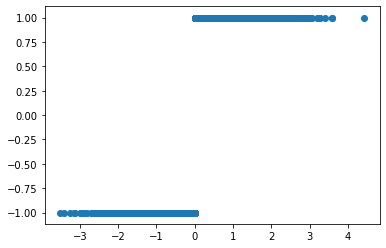

In [6]:
plt.scatter(X_all,y_all)

In [7]:
y_all

array([-1,  1, -1, ...,  1, -1, -1])

In [8]:
X_all

array([[-0.73830887],
       [ 0.28897079],
       [-0.20753046],
       ...,
       [ 1.58381409],
       [-2.02719996],
       [-0.44598251]])

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X_all,y_all,test_size=0.5,random_state=42)

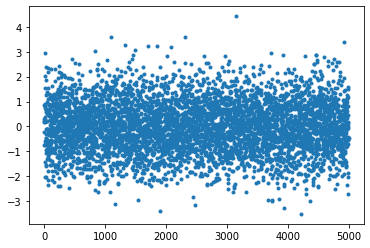

In [11]:
plt.plot(X_all,'.')

In [14]:
clf=DecisionTreeClassifier(max_depth=1)
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))

1.0


In [15]:
clf = GradientBoostingClassifier(n_estimators=5000, learning_rate=0.01, max_depth=3, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict_proba(X_test)[:, 1]
print(log_loss(y_test, y_pred))

0.0003137638088280176


In [17]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [18]:
def compute_loss(y_true, scores_pred):
 
    return log_loss(y_true, sigmoid(scores_pred))
    
cum_preds = np.array([x for x in clf.staged_decision_function(X_test)])[:, :, 0] 

print ("Logloss using all trees:           {}".format(compute_loss(y_test, cum_preds[-1, :])))
print ("Logloss using all trees but last:  {}".format(compute_loss(y_test, cum_preds[-2, :])))
print ("Logloss using all trees but first: {}".format(compute_loss(y_test, cum_preds[-1, :] - cum_preds[0, :])))

Logloss using all trees:           0.0003137638088280176
Logloss using all trees but last:  0.0003137638088280176
Logloss using all trees but first: 0.00032035677721621873


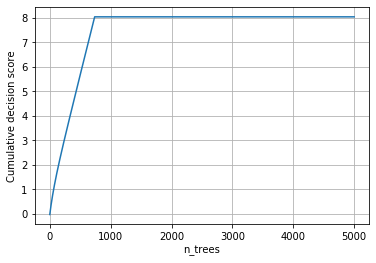

In [20]:
plt.plot(cum_preds[:, y_test == 1][:, 0])

plt.xlabel('n_trees')
plt.grid()
plt.ylabel('Cumulative decision score');

In [24]:
X_all, y_all = make_hastie_10_2(random_state=0)

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X_all,y_all,test_size=0.5,random_state=42)

In [26]:
X_all.shape

(12000, 10)

In [27]:
y_all.shape

(12000,)

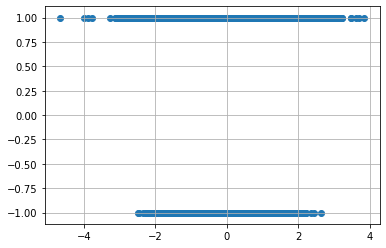

In [29]:
plt.scatter(X_all[:,0],y_all)
plt.grid()

In [30]:
clf = GradientBoostingClassifier(n_estimators=5000, learning_rate=0.01, max_depth=3, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict_proba(X_test)[:, 1]
print(log_loss(y_test, y_pred))

0.1805966138098417


In [31]:
cum_preds = np.array([x for x in clf.staged_decision_function(X_test)])[:, :, 0] 

print ("Logloss using all trees:           {}".format(compute_loss(y_test, cum_preds[-1, :])))
print ("Logloss using all trees but last:  {}".format(compute_loss(y_test, cum_preds[-2, :])))
print ("Logloss using all trees but first: {}".format(compute_loss(y_test, cum_preds[-1, :] - cum_preds[0, :])))

Logloss using all trees:           0.1805966138098417
Logloss using all trees but last:  0.18062460612841008
Logloss using all trees but first: 0.18064883270679305


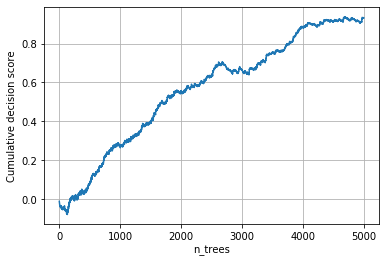

In [32]:
plt.plot(cum_preds[:, y_test == 1][:, 0])

plt.xlabel('n_trees')
plt.grid()
plt.ylabel('Cumulative decision score');